In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)
# print('Matplotlib version :',mpl.__version__)

Pandas version : 1.4.4
Numpy version : 1.23.3


In [2]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

In [3]:
# https://archive.ics.uci.edu/ml/datasets/heart+Disease
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs",
                "restecg", "thalach", "exang", "oldpeak", "slope",
                "ca", "thal", "num"]
df = pd.read_csv("./data/processed.cleveland.data", header=None, names=column_names) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
211,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,4
268,40.0,1.0,4.0,152.0,223.0,0.0,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1
147,41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0


In [5]:
df.groupby('thal').size().reset_index(name = '#')

,thal,#
0,3.0,166
1,6.0,18
2,7.0,117
3,?,2


In [6]:
df[df['thal'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [7]:
df.groupby('ca').size().reset_index(name = '#')

,ca,#
0,0.0,176
1,1.0,65
2,2.0,38
3,3.0,20
4,?,4


In [8]:
df[df['ca'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
# if there are little (6 row) you can drop it out
df = df[df['thal'] != '?'].reset_index(drop = True)
df = df[df['ca'] != '?'].reset_index(drop = True)
# df = df[(df['thal'] != '?') | ( df['ca'] != '?')].reset_index(drop = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [50]:
df.shape

(297, 15)

In [10]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [11]:
# ca           object
# thal         object
# change object to float
df["thal"] = df["thal"].astype(float)
df["ca"] = df["ca"].astype(float)

In [12]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [13]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

# Data tranformation

In [14]:
sex = pd.get_dummies(df["sex"])
sex = sex.rename(columns={0.0: "female", 1.0: "male"})
sex = sex.drop("female", axis=1)
sex.head()

,male
0,1
1,1
2,1
3,1
4,0


In [15]:
cp = pd.get_dummies(df["cp"])
cp = cp.rename(columns={1.0: "Typical", 2.0: "Atypical", 3.0: "Non-anginal", 4.0: "Asymptomatic"})
cp = cp.drop("Typical", axis=1)
cp.head()

,Atypical,Non-anginal,Asymptomatic
0,0,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [16]:
fbs = pd.get_dummies(df["fbs"])
fbs = fbs.rename(columns={0.0: "FBS<120", 1.0: "FBS>120"})
fbs = fbs.drop("FBS<120", axis=1)
fbs.head()

,FBS>120
0,1
1,0
2,0
3,0
4,0


In [17]:
restecg = pd.get_dummies(df["restecg"])
restecg = restecg.rename(columns={0.0: "Normal", 1.0: "ST-abnormal", 2.0: "Left_Ventricular_Hypertrophy"})
restecg = restecg.drop("Normal", axis=1)
restecg.head()

,ST-abnormal,Left_Ventricular_Hypertrophy
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1


In [18]:
exang = pd.get_dummies(df["exang"])
exang = exang.rename(columns={0.0: "No", 1.0: "Yes"})
exang = exang.drop("No", axis=1)
exang = exang.rename(columns={"Yes": "exang"})
exang.head()

,exang
0,0
1,1
2,1
3,0
4,0


In [19]:
slope = pd.get_dummies(df["slope"])
slope = slope.rename(columns={1.0: "Upsloping", 2.0: "Flat", 3.0: "Normal"})
slope = slope.drop("Flat", axis=1)
slope.head()

,Upsloping,Normal
0,0,1
1,0,0
2,0,0
3,0,1
4,1,0


In [20]:
thal = pd.get_dummies(df["thal"])
thal = thal.rename(columns={3.0: "Normal", 6.0: "fixed_defect", 7.0: "reversable_defect"})
thal = thal.drop("Normal", axis=1)
thal.head()

,fixed_defect,reversable_defect
0,1,0
1,0,0
2,0,1
3,0,0
4,0,0


In [21]:
# encoding
df["label"] = df['num'].apply(lambda x: 0 if x == 0 else 1)
# drop num column
num = pd.get_dummies(df["label"])
num = num.rename(columns={0: "~HD", 1: "HD"})
num = num.drop("~HD", axis=1)
num.head()

,HD
0,0
1,1
2,1
3,0
4,0


In [22]:
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
data = pd.concat([df.loc[:, numeric_features], sex, cp, fbs, restecg, exang, slope, thal, num], axis=1)
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,male,Atypical,Non-anginal,Asymptomatic,FBS>120,ST-abnormal,Left_Ventricular_Hypertrophy,exang,Upsloping,Normal,fixed_defect,reversable_defect,HD
0,63.0,145.0,233.0,150.0,2.3,0.0,1,0,0,0,1,0,1,0,0,1,1,0,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1,0,0,1,0,0,1,1,0,0,0,0,1
2,67.0,120.0,229.0,129.0,2.6,2.0,1,0,0,1,0,0,1,1,0,0,0,1,1
3,37.0,130.0,250.0,187.0,3.5,0.0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [23]:
data.dtypes

age                             float64
trestbps                        float64
chol                            float64
thalach                         float64
oldpeak                         float64
ca                              float64
male                              uint8
Atypical                          uint8
Non-anginal                       uint8
Asymptomatic                      uint8
FBS>120                           uint8
ST-abnormal                       uint8
Left_Ventricular_Hypertrophy      uint8
exang                             uint8
Upsloping                         uint8
Normal                            uint8
fixed_defect                      uint8
reversable_defect                 uint8
HD                                uint8
dtype: object

In [51]:
features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "male", "Atypical", "Non-anginal", "Asymptomatic",
           "FBS>120", "ST-abnormal", "Left_Ventricular_Hypertrophy", "exang", "Upsloping", "Normal", "fixed_defect",
           "reversable_defect"]
X = data.loc[:, features].values
y = data["HD"].values.ravel()
X

array([[ 63., 145., 233., ...,   1.,   1.,   0.],
       [ 67., 160., 286., ...,   0.,   0.,   0.],
       [ 67., 120., 229., ...,   0.,   0.,   1.],
       ...,
       [ 68., 144., 193., ...,   0.,   0.,   1.],
       [ 57., 130., 131., ...,   0.,   0.,   1.],
       [ 57., 130., 236., ...,   0.,   0.,   0.]])

# CEB Research way

In [25]:
seed = 433 # Set random seed

train, remain = train_test_split(data, test_size=int(np.floor(0.30 * len(data.index))), 
                                stratify=data["HD"], random_state=seed)

test, val = train_test_split(remain, test_size=int(np.floor(0.5 * len(remain.index))), 
                             stratify=remain["HD"], random_state=seed)

print("Number of training samples is {}".format(len(train.index)))
print("Number of test samples is {}".format(len(test.index)))
print("Number of validate samples is {}".format(len(val.index)))

Number of training samples is 208
Number of test samples is 45
Number of validate samples is 44


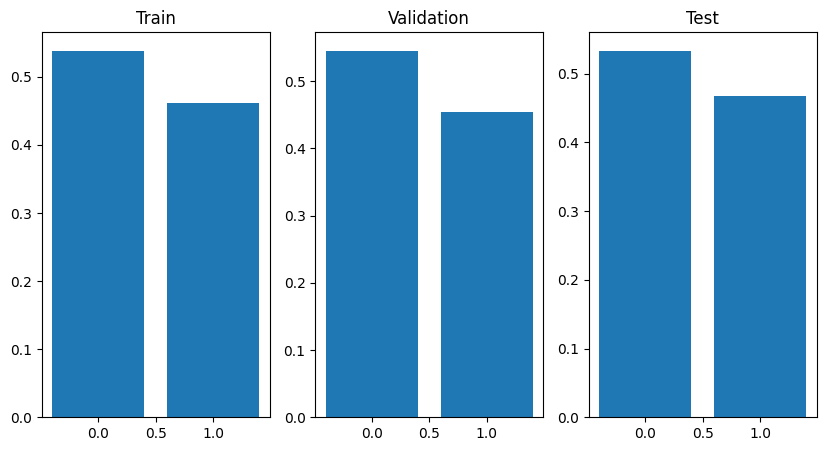

In [26]:
train_dist = train.groupby("HD").size().reset_index(name="#")
train_dist["%"] = train_dist["#"] / train_dist["#"].sum()

val_dist = val.groupby("HD").size().reset_index(name="#")
val_dist["%"] = val_dist["#"] / val_dist["#"].sum()

test_dist = test.groupby("HD").size().reset_index(name="#")
test_dist["%"] = test_dist["#"] / test_dist["#"].sum()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
ax[0].bar(train_dist["HD"], train_dist["%"])
ax[0].set_title("Train")
ax[1].bar(val_dist["HD"], val_dist["%"])
ax[1].set_title("Validation")
ax[2].bar(test_dist["HD"], test_dist["%"])
ax[2].set_title("Test")
plt.show()

# Modeling Random and Grid search
max_depth 1-5  
min_sample_split 5-20

In [27]:
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Random search

In [28]:
np.random.seed(seed)
rd_hparams = dict(C=uniform(loc=0, scale=5), penalty=["l2", "l1"])
rd_hparams

{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x1d810043190>,
 'penalty': ['l2', 'l1']}

In [29]:
logreg = LogisticRegression(class_weight="balanced",
                            random_state=seed,
                            verbose=1,
                            solver="saga",
                            max_iter=10000)

In [30]:
rand_tune = RandomizedSearchCV(logreg, 
                               rd_hparams, 
                               random_state=seed, 
                               cv=[(train.index, val.index)], 
                               scoring="accuracy")

rand_search = rand_tune.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5109 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5102 epochs took 2 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5019 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5110 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5118 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4970 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5105 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4882 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4951 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5112 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5136 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [31]:
rand_search.best_estimator_

LogisticRegression(C=2.3907937312322107, class_weight='balanced',
                   max_iter=10000, penalty='l1', random_state=433,
                   solver='saga', verbose=1)

C=2.3907937312322107,penalty='l1'

## Grid search

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
for i in range(-5, 6):
  print(i)

-5
-4
-3
-2
-1
0
1
2
3
4
5


In [34]:
C = [rand_search.best_estimator_.C + 0.1*i for i in range(-5, 6)]
print(C)
# C cannot be neg

[1.8907937312322107, 1.9907937312322108, 2.0907937312322105, 2.1907937312322106, 2.2907937312322106, 2.3907937312322107, 2.490793731232211, 2.590793731232211, 2.690793731232211, 2.7907937312322106, 2.8907937312322107]


In [35]:
gd_hparams = {"C": [i if i > 0 else 0.1 for i in C], "penalty": [rand_search.best_estimator_.penalty]}

In [36]:
grid_tune = GridSearchCV(logreg, gd_hparams, cv=[(train.index, val.index)], scoring="accuracy")
grid_search = grid_tune.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5100 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5102 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5104 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5106 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5108 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5109 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5110 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5112 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5113 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5114 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5115 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5125 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


In [37]:
grid_search.best_estimator_ 

LogisticRegression(C=1.8907937312322107, class_weight='balanced',
                   max_iter=10000, penalty='l1', random_state=433,
                   solver='saga', verbose=1)

C=1.8907937312322107,penalty='l1'

In [38]:
grid_search.best_estimator_.coef_

array([[-0.00706679,  0.01512849,  0.00302391, -0.02572958,  0.41342039,
         0.63189184,  0.36822889, -0.08283408, -0.25769889,  0.46025091,
        -0.03804641,  0.        ,  0.11236033,  0.29578195, -0.19089941,
        -0.00839689,  0.00589576,  0.48872202]])

# Evaluation

In [39]:
from sklearn.metrics import roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [40]:
prob_train = grid_search.best_estimator_.predict_proba(X[train.index])
prob_test = grid_search.best_estimator_.predict_proba(X[test.index])

# Threshold calibration

In [41]:
fpr, tpr, thresholds = roc_curve(y_true=y[train.index], y_score=prob_train[:, 1], pos_label=1)
idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[idx]
print("The optimal threshold is {}".format(optimal_threshold))

The optimal threshold is 0.5002581428924748


In [42]:
yhat = (prob_test[:, 1] >= optimal_threshold).astype(int)
yhat

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1])

In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Performance

In [44]:
cmat = confusion_matrix(y[test.index], yhat)
print(cmat)

[[21  3]
 [ 5 16]]


|0|1|
|--|--|
|TN | |
| | TP|

In [45]:
precision = precision_score(y[test.index], yhat)
recall = recall_score(y[test.index], yhat)
accuracy = accuracy_score(y[test.index], yhat)
f1 = f1_score(y[test.index], yhat)

print("Precision is {}".format(round(precision, 3)))
print("Recall is {}".format(round(recall, 3)))
print("Accuracy is {}".format(round(accuracy, 3)))
print("F1 is {}".format(round(f1, 3)))


Precision is 0.842
Recall is 0.762
Accuracy is 0.822
F1 is 0.8


In [46]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

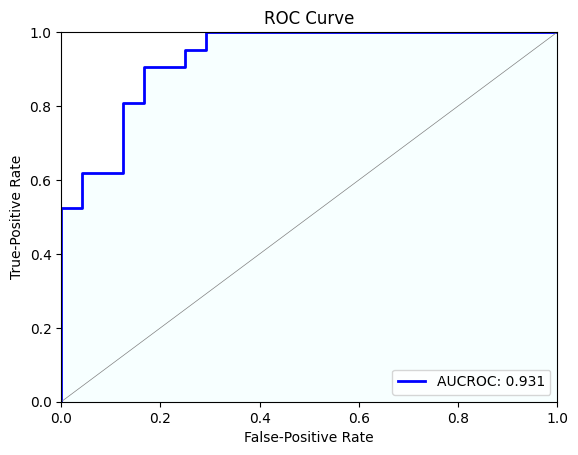

In [47]:
aucroc = roc_auc_score(y_true=y[test.index], y_score=prob_test[:, 1])
fpr, tpr, thresholds = roc_curve(y_true=y[test.index], y_score=prob_test[:, 1], pos_label=1)

plt.style.use("default")
plt.plot(fpr, tpr, color="blue", linewidth=2, label="AUCROC: {}".format(round(aucroc, 3)))
plt.plot([0, 1], [0, 1], color="gray", linewidth=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False-Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.fill_between(fpr, tpr, color="azure", alpha=0.5)
plt.savefig("./roc_logreg.svg", format="svg")

## dont use jpeg use svg vector images no broke

Import module

In [48]:
import pickle
pickle.dump(grid_search.best_estimator_, open("./hdlr.pkl", "wb"))

## use precision_recall_curve for imbalance class

FileNotFoundError: [Errno 2] No such file or directory: './images/pr_dt.svg'

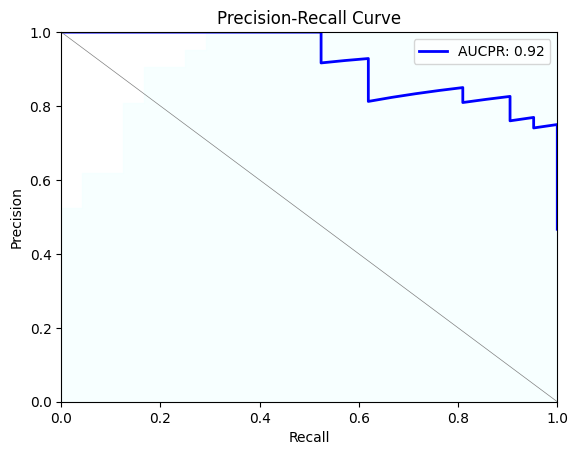

In [49]:
# use precision_recall_curve for imbalance class
p, r, t = precision_recall_curve(y_true=y[test.index], probas_pred=prob_test[:, 1], pos_label=1)
aucpr = auc(r, p)
plt.style.use("default")
plt.plot(r, p, color="blue", linewidth=2, label="AUCPR: {}".format(round(aucpr, 3)))
plt.plot([1, 0], [0, 1], color="gray", linewidth=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.fill_between(fpr, tpr, color="azure", alpha=0.5)
plt.savefig("./images/pr_dt.svg", format="svg")


# Analysis of Errors

[Text(0.5, 0.875, 'thal <= 4.5\ngini = 0.5\nsamples = 297\nvalue = [148.5, 148.5]\nclass = y[1]'),
 Text(0.25, 0.625, 'ca <= 0.5\ngini = 0.379\nsamples = 164\nvalue = [117.872, 40.106]\nclass = y[0]'),
 Text(0.125, 0.375, 'trestbps <= 157.0\ngini = 0.226\nsamples = 115\nvalue = [94.669, 14.091]\nclass = y[0]'),
 Text(0.0625, 0.125, 'gini = 0.172\nsamples = 109\nvalue = [92.812, 9.755]\nclass = y[0]'),
 Text(0.1875, 0.125, 'gini = 0.42\nsamples = 6\nvalue = [1.856, 4.336]\nclass = y[1]'),
 Text(0.375, 0.375, 'cp <= 3.5\ngini = 0.498\nsamples = 49\nvalue = [23.203, 26.015]\nclass = y[1]'),
 Text(0.3125, 0.125, 'gini = 0.395\nsamples = 29\nvalue = [20.419, 7.588]\nclass = y[0]'),
 Text(0.4375, 0.125, 'gini = 0.228\nsamples = 20\nvalue = [2.784, 18.427]\nclass = y[1]'),
 Text(0.75, 0.625, 'cp <= 3.5\ngini = 0.344\nsamples = 133\nvalue = [30.628, 108.394]\nclass = y[1]'),
 Text(0.625, 0.375, 'ca <= 0.5\ngini = 0.499\nsamples = 44\nvalue = [21.347, 22.763]\nclass = y[1]'),
 Text(0.5625, 0.12

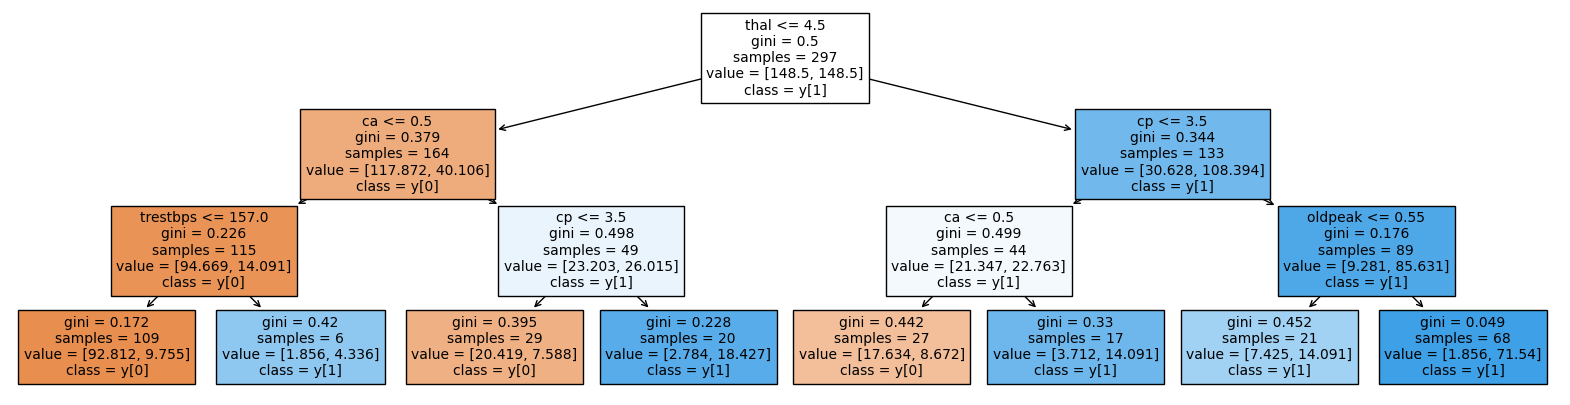

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,5))
tree.plot_tree(grid_search.best_estimator_, fontsize=10, feature_names=df.columns[0:-1], class_names=True, filled=True)


## Analyzing Misclassified

In [ ]:
test_samples = test.copy()
test_samples["yhat"] = yhat
missclf = test_samples[test_samples["label"] != test_samples["yhat"]].reset_index()

In [ ]:
missclf

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,yhat
0,10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0,1
1,75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0,1
2,240,61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0,1,0
3,247,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0,1
4,289,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1,0
5,101,57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0,1
6,142,64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1,0
7,174,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0,1


In [ ]:
def error_types(label, yhat):
    if (label == 1) & (yhat == 0):
        return "fn"
    elif (label == 0) & (yhat == 1):
        return "fp"
    else:
        return "correct"

In [ ]:
missclf["error"] = missclf.apply(lambda x: error_types(x["label"], x["yhat"]), axis=1)
missclf

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,yhat,error
0,10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0,1,fp
1,75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0,1,fp
2,240,61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0,1,0,fn
3,247,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0,1,fp
4,289,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1,0,fn
5,101,57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0,1,fp
6,142,64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1,0,fn
7,174,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0,1,fp


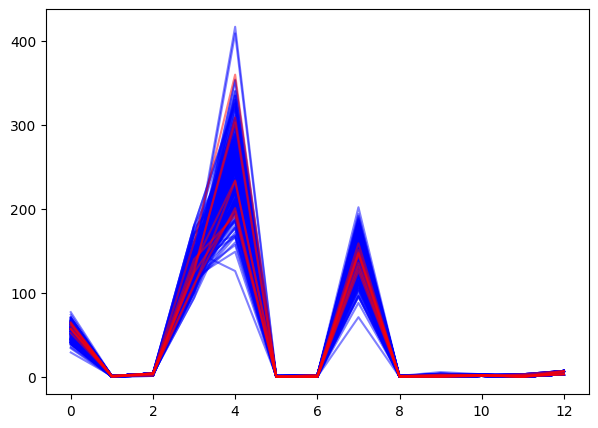

In [ ]:
figure, axis = plt.subplots(figsize=(7, 5))

for i in train.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = train.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="blue")
    
for i in missclf.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = missclf.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="red")
    # if red out of blue mean coverage problem

### if red out of blue mean coverage problem

In [ ]:
fp = missclf[missclf["error"] == "fp"].reset_index(drop=True)
pos_samples = train[train["label"] == 1].reset_index()

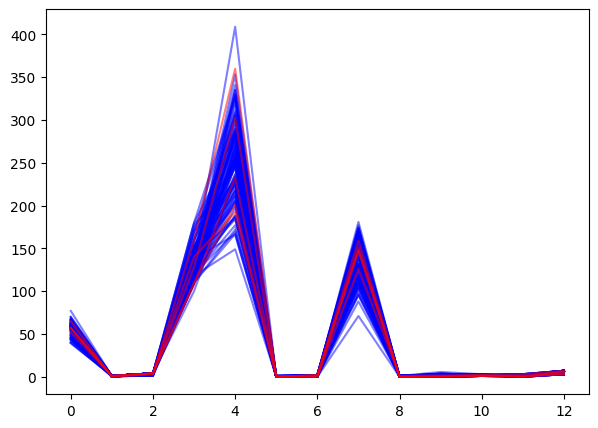

In [ ]:
figure, axis = plt.subplots(figsize=(7, 5))

for i in pos_samples.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = pos_samples.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="blue")
    
for i in fp.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = fp.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="red")
